# Representation Learning: Part 1

https://youtu.be/1V_M4JxygGk?list=PLZ2ps__7DhBbA_e6_G3FI-BA1f7lCINUu&t=533

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [30]:
X = np.array([
    [-7, -14],
    [2.5, 5],
    [0.5, 1],
    [0, 0],
]).T
X
X.shape

X_mean = np.mean(X, axis=1, keepdims=True)
X_mean
X_mean.shape

array([[ -7. ,   2.5,   0.5,   0. ],
       [-14. ,   5. ,   1. ,   0. ]])

(2, 4)

array([[-1.],
       [-2.]])

(2, 1)

In [31]:
X_centered = X - X_mean
X_centered
X_centered.shape

array([[ -6. ,   3.5,   1.5,   1. ],
       [-12. ,   7. ,   3. ,   2. ]])

(2, 4)

In [32]:
n = X.shape[1]
C = (X_centered @ X_centered.T) / n
C
C.shape

array([[12.875, 25.75 ],
       [25.75 , 51.5  ]])

(2, 2)

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors.T[sorted_indices]

eigenvalues
eigenvectors

array([64.375,  0.   ])

array([[-0.4472, -0.8944],
       [-0.8944,  0.4472]])

# projecting data on just PC1

In [34]:
W = eigenvectors[:1]
eigenvectors
W

array([[-0.4472, -0.8944],
       [-0.8944,  0.4472]])

array([[-0.4472, -0.8944]])

In [35]:
W.shape, X_centered.shape

X_transformed = W @ X_centered
X_transformed
X_transformed.shape

((1, 2), (2, 4))

array([[13.4164, -7.8262, -3.3541, -2.2361]])

(1, 4)

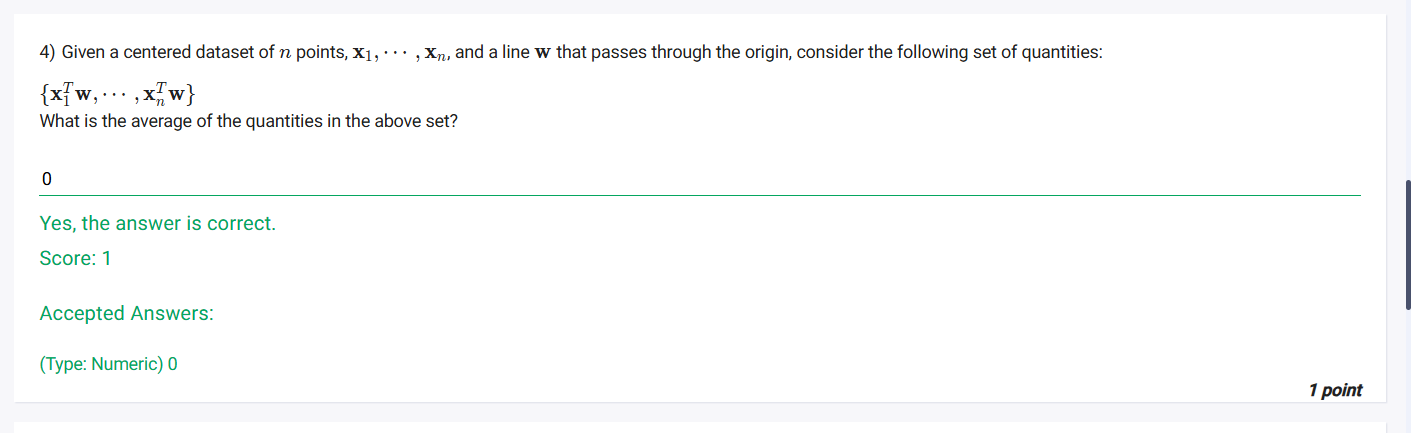

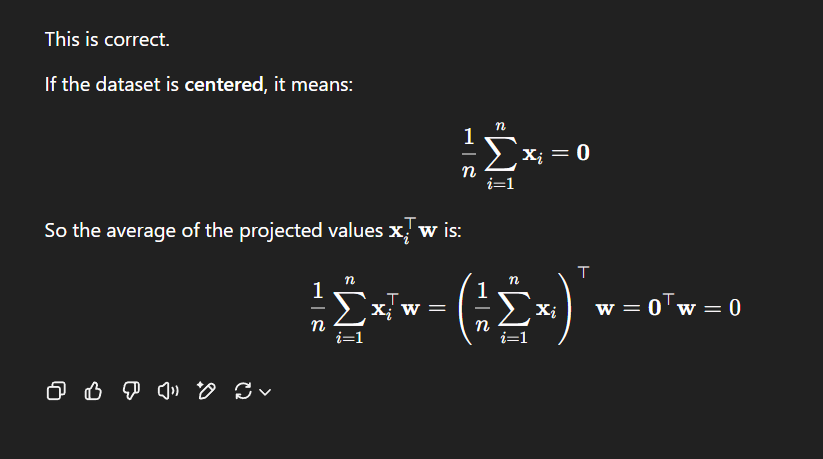

In [36]:
np.mean(X_transformed[0])

np.float64(2.220446049250313e-16)

In [37]:
W.shape, X_transformed.shape

X_reconstructed = W.T @ X_transformed + X_mean
X_reconstructed
X_reconstructed.shape
np.allclose(X, X_reconstructed)

((1, 2), (1, 4))

array([[ -7. ,   2.5,   0.5,   0. ],
       [-14. ,   5. ,   1. ,   0. ]])

(2, 4)

True

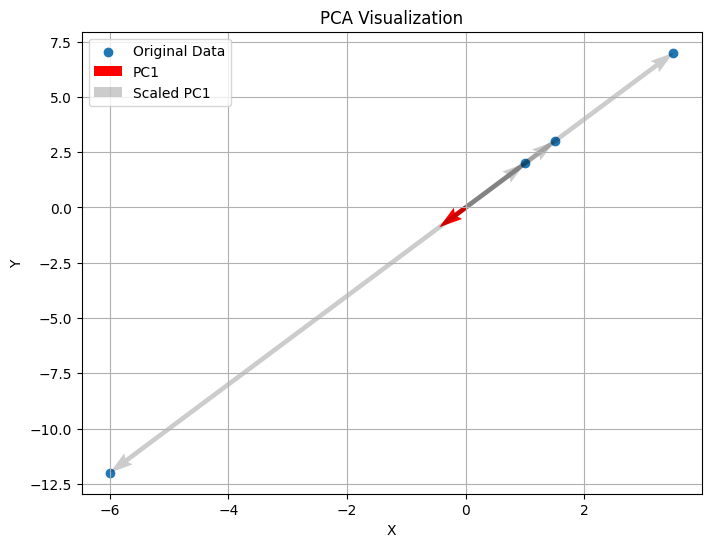

In [38]:


def plot_pca_visualization():
  plt.figure(figsize=(8, 6))
  plt.scatter(X_centered[0], X_centered[1], label='Original Data')
  plt.quiver(0, 0, eigenvectors[0][0], eigenvectors[0][1], angles='xy',
             scale_units='xy', scale=1, color='r', label='PC1')

  for i in range(len(X_transformed[0])):
    scalar = X_transformed[0][i]
    plt.quiver(0, 0, eigenvectors[0][0] * scalar, eigenvectors[0][1] * scalar, angles='xy',
               scale_units='xy', scale=1, alpha=0.2, label='Scaled PC1' if i == 0 else "")

  plt.legend()
  plt.grid(True)
  plt.title('PCA Visualization')
  plt.xlabel('X')
  plt.ylabel('Y')


plot_pca_visualization()

# choosing a representative manually

In [39]:
W = np.array([[1, 2]])

W.shape
X.shape

(1, 2)

(2, 4)

In [40]:
X_transformed = W @ X / np.linalg.norm(W[0])**2

X_transformed
X_transformed.shape

array([[-7. ,  2.5,  0.5,  0. ]])

(1, 4)

In [41]:
X_reconstructed = W.T @ X_transformed

X_reconstructed
X_reconstructed.shape

array([[ -7. ,   2.5,   0.5,   0. ],
       [-14. ,   5. ,   1. ,   0. ]])

(2, 4)

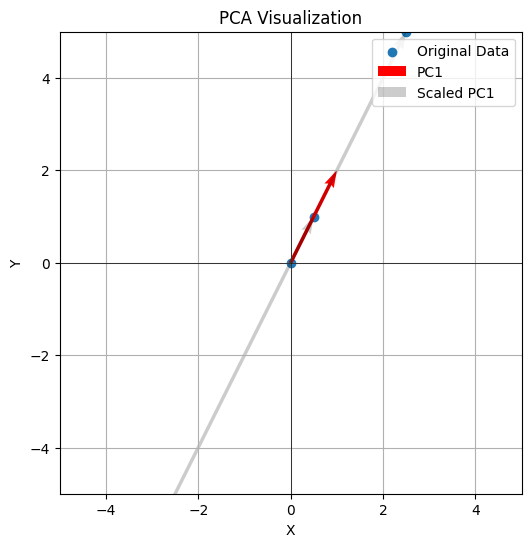

In [69]:
def plot_pca_visualization():
  plt.figure(figsize=(8, 6))
  plt.scatter(X[0], X[1], label='Original Data')
  plt.quiver(0, 0, W[0][0], W[0][1], angles='xy',
             scale_units='xy', scale=1, color='r', label='PC1')

  for i in range(len(X_transformed[0])):
    scalar = X_transformed[0][i]
    plt.quiver(0, 0, W[0][0] * scalar, W[0][1] * scalar, angles='xy',
               scale_units='xy', scale=1, alpha=0.2, label='Scaled PC1' if i == 0 else "")

  plt.gca().set_aspect('equal', adjustable='box')
  plt.legend()
  plt.grid(True)
  plt.title('PCA Visualization')
  plt.xlabel('X')
  plt.ylabel('Y')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)

  lim = 5  # try 5, 15
  plt.xlim(-lim, lim)
  plt.ylim(-lim, lim)


plot_pca_visualization()